In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # advanced plotting library
import pickle

# classification unsupervised - clustering

In [2]:
pd.set_option('max_columns', None)
data = pd.read_csv('drug_consumption.data')
# TODO: drop first row altogether because it's just the row number
# TODO: classify by user/non-user
# TODO: handle the classification for specific drug use, then standard scale the remaining numerical 'real' values
# data

In [15]:
data_with_headers = pd.read_csv('drug_consumption_with_headers.data')
# Remove extra spaces from headers
data_with_headers = data_with_headers.rename(columns=lambda x: x.strip())
data_with_headers
pd.set_option('max_columns', None)


In [16]:
data_with_headers.head()

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)],Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [5]:
data_with_headers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       1885 non-null   int64  
 1    Age (Real)                              1885 non-null   float64
 2    Gender (Real)                           1885 non-null   float64
 3    Education (Real)                        1885 non-null   float64
 4    Country (Real)                          1885 non-null   float64
 5    Ethnicity (Real)                        1885 non-null   float64
 6    Nscore (Real) [neuroticism]             1885 non-null   float64
 7    Escore (Real) [Extraversion]            1885 non-null   float64
 8    Oscore (Real) [Openness to experience]  1885 non-null   float64
 9    Ascore (Real) [Agreeableness]           1885 non-null   float64
 10   Cscore (Real) [Conscientiousness]       1885 no

In [6]:
data_with_headers.describe()

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)]
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [20]:
data_with_headers.all()

ID                                         True
 Age (Real)                                True
 Gender (Real)                             True
 Education (Real)                          True
 Country (Real)                            True
 Ethnicity (Real)                          True
 Nscore (Real) [neuroticism]               True
 Escore (Real) [Extraversion]              True
 Oscore (Real) [Openness to experience]    True
 Ascore (Real) [Agreeableness]             True
 Cscore (Real) [Conscientiousness]         True
 Impulsive (Real)                          True
 SS (Real) [sensation seeing (sic)]        True
 Alcohol                                   True
 Amphet                                    True
 Amyl                                      True
 Benzos                                    True
 Caff                                      True
 Cannabis                                  True
 Choc                                      True
 Coke                                   

In [25]:
labels = ['ID', 'Age (Real)', 'Gender (Real)', 'Education (Real)', 'Country (Real)', 'Ethnicity (Real)', 'Nscore (Real) [neuroticism]', 'Escore (Real) [Extraversion]', 'Oscore (Real) [Openness to experience]', 'Ascore (Real) [Agreeableness]', 'Cscore (Real) [Conscientiousness]', 'Impulsive (Real)', 'SS (Real) [sensation seeing (sic)]', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstacy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

In [9]:
data_with_headers.columns

Index(['ID', 'Age (Real)', 'Gender (Real)', 'Education (Real)',
       'Country (Real)', 'Ethnicity (Real)', 'Nscore (Real) [neuroticism]',
       'Escore (Real) [Extraversion]',
       'Oscore (Real) [Openness to experience]',
       'Ascore (Real) [Agreeableness]', 'Cscore (Real) [Conscientiousness]',
       'Impulsive (Real)', 'SS (Real) [sensation seeing (sic)]', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstacy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':' Age (Real)'}>,
        <AxesSubplot:title={'center':' Gender (Real)'}>,
        <AxesSubplot:title={'center':' Education (Real)'}>],
       [<AxesSubplot:title={'center':' Country (Real)'}>,
        <AxesSubplot:title={'center':' Ethnicity (Real)'}>,
        <AxesSubplot:title={'center':' Nscore (Real) [neuroticism]'}>,
        <AxesSubplot:title={'center':' Escore (Real) [Extraversion]'}>],
       [<AxesSubplot:title={'center':' Oscore (Real) [Openness to experience]'}>,
        <AxesSubplot:title={'center':' Ascore (Real) [Agreeableness]'}>,
        <AxesSubplot:title={'center':' Cscore (Real) [Conscientiousness]'}>,
        <AxesSubplot:title={'center':' Impulsive (Real)'}>],
       [<AxesSubplot:title={'center':' SS (Real) [sensation seeing (sic)]'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

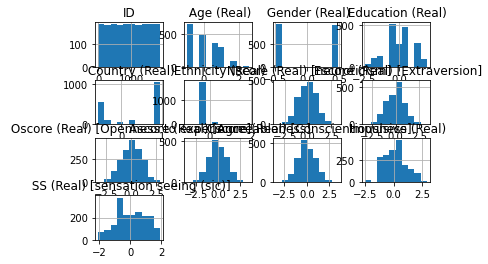

In [14]:
data_with_headers.hist()

<AxesSubplot:>

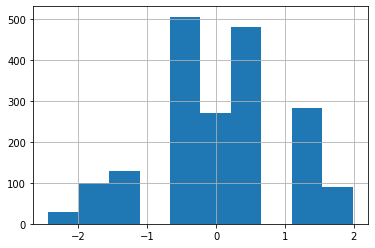

In [26]:
data_with_headers['Education (Real)'].hist()

In [104]:
data_with_headers["Cannabis"].value_counts(), data_with_headers["Crack"].value_counts(), data_with_headers["Ketamine"].value_counts(),  data_with_headers["Semer"].value_counts()

(CL6    463
 CL0    413
 CL2    266
 CL3    211
 CL1    207
 CL5    185
 CL4    140
 Name:  Cannabis, dtype: int64,
 CL0    1627
 CL2     112
 CL1      67
 CL3      59
 CL5       9
 CL4       9
 CL6       2
 Name:  Crack, dtype: int64,
 CL0    1490
 CL2     142
 CL3     129
 CL1      45
 CL4      42
 CL5      33
 CL6       4
 Name:  Ketamine, dtype: int64,
 CL0    1877
 CL2       3
 CL3       2
 CL1       2
 CL4       1
 Name:  Semer, dtype: int64)

# Summary 

1. 31 Features, 1885 Samples
2. ID is an INT64, 
3. AGE, GENDER, EDUCATION, COUNTRY, ETHNICITY, are FLOAT64, have designated value for things (.48 = Female, -.48 mile)
4. Nscore, Escore, Oscore, Ascore, Cscore, Impuslive, SS are FLOAT64 to meaurse personality types
5. The Rest Alchohol..Caff..Choc.. are objects that contain a value a "C0" to "C6" to represent the different usages 


In [24]:
data = data_with_headers.copy()

In [25]:
data

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)],Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


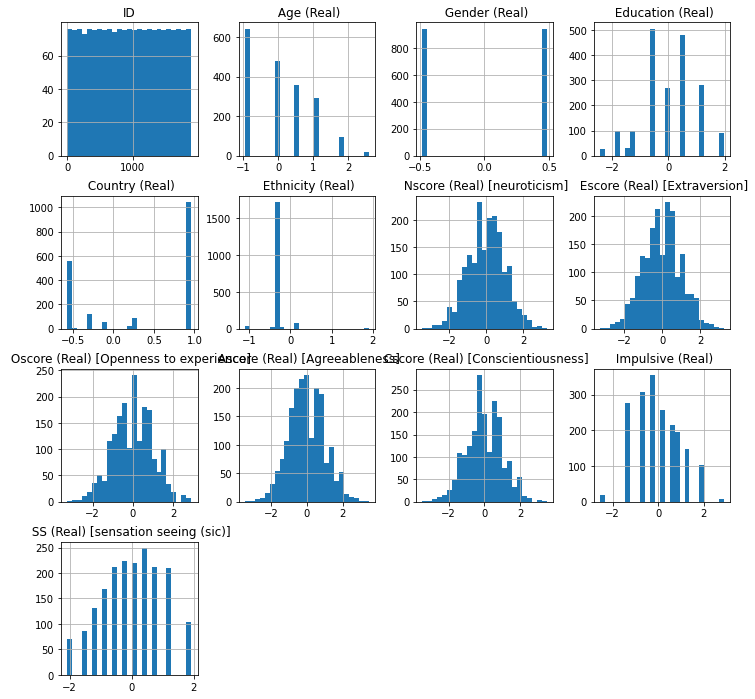

In [28]:
# View all of the histograms (except categorical)
# We discover most are log-normally distributed
data.hist(bins=25, figsize=(12, 12));

In [4]:
personality_labels = ['Escore (Real) [Extraversion]','Oscore (Real) [Openness to experience]','Ascore (Real) [Agreeableness]','Cscore (Real) [Conscientiousness]','Impulsive (Real)','SS (Real) [sensation seeing (sic)]']
drug_labels = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke',
       'Crack', 'Ecstacy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
numerical_values = ['Escore (Real) [Extraversion]', 'Oscore (Real) [Openness to experience]', 'Ascore (Real) [Agreeableness]', 'Cscore (Real) [Conscientiousness]', 'Impulsive (Real)', 'SS (Real) [sensation seeing (sic)]', 'ID', 'Age (Real)', 'Gender (Real)', 'Education (Real)',
       'Country (Real)', 'Ethnicity (Real)']


In [34]:
from collections import Counter

In [35]:
alchocoh = Counter(data_with_headers['Alcohol'])


array([[<AxesSubplot:title={'center':'Escore (Real) [Extraversion]'}>,
        <AxesSubplot:title={'center':'Oscore (Real) [Openness to experience]'}>],
       [<AxesSubplot:title={'center':'Ascore (Real) [Agreeableness]'}>,
        <AxesSubplot:title={'center':'Cscore (Real) [Conscientiousness]'}>],
       [<AxesSubplot:title={'center':'Impulsive (Real)'}>,
        <AxesSubplot:title={'center':'SS (Real) [sensation seeing (sic)]'}>]],
      dtype=object)

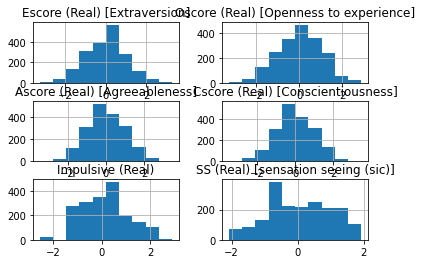

In [36]:
data_with_headers[personality_labels].hist()

<AxesSubplot:>

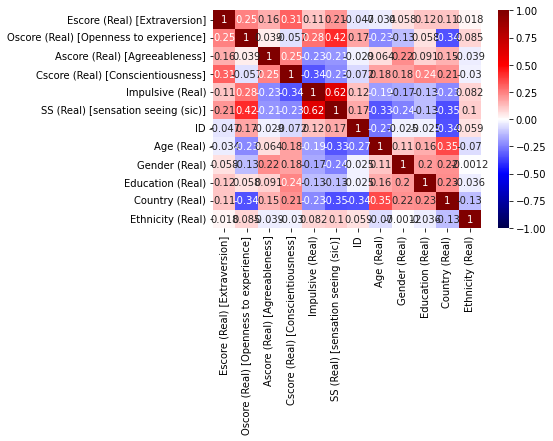

In [37]:
plt.figure(figsize=(6, 4))
# Split train test data off
sns.heatmap(data_with_headers[numerical_values].corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

<AxesSubplot:>

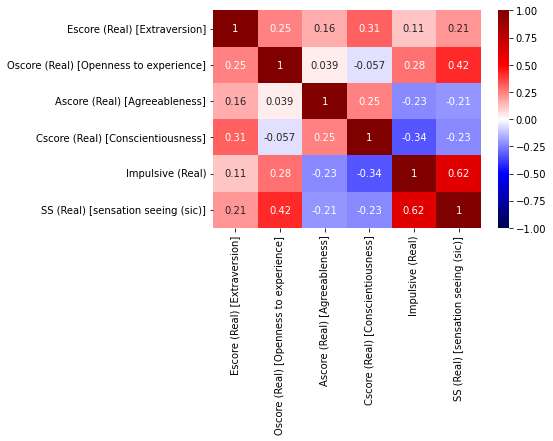

In [38]:
plt.figure(figsize=(6, 4))
sns.heatmap(data_with_headers[personality_labels].corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

<AxesSubplot:>

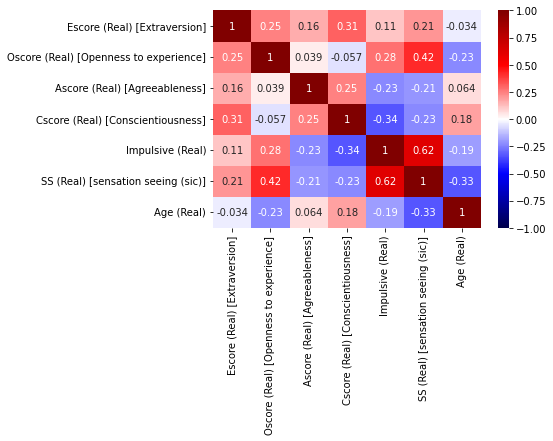

In [39]:
plt.figure(figsize=(6, 4))
sns.heatmap(data_with_headers[['Escore (Real) [Extraversion]', 'Oscore (Real) [Openness to experience]', 'Ascore (Real) [Agreeableness]', 'Cscore (Real) [Conscientiousness]', 'Impulsive (Real)', 'SS (Real) [sensation seeing (sic)]', 'Age (Real)']].corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')


In [5]:
list_of_drugs = ['Coke', 'Meth', 'Heroin', 'Cannabis', 'Ecstacy', 'Benzos', 'Alcohol', 'Amphet', 'Amyl', 'LSD', 'Legalh', 'Semer', 'VSA']

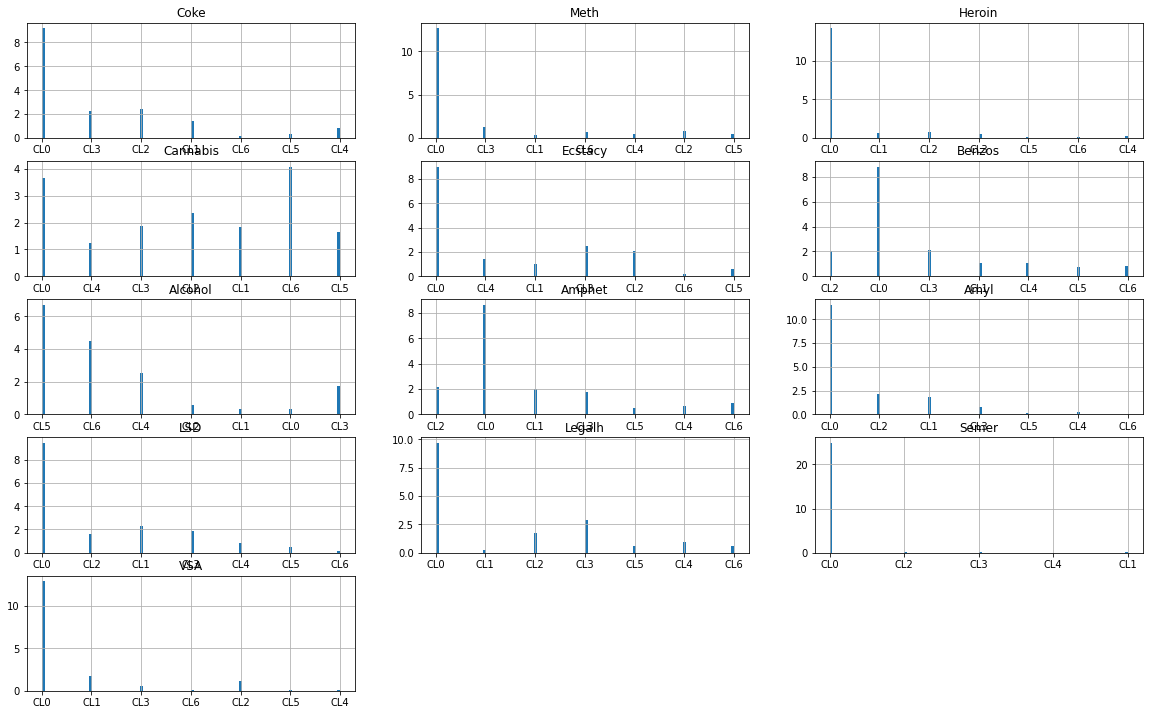

In [41]:
# Distances
plt.figure(figsize=(20, 25))

for i in range(len(list_of_drugs)):
    plt.subplot(10, 3, i+1)
    plt.title(list_of_drugs[i])
    data_with_headers[list_of_drugs[i]].hist(bins=100, density=True)
    # plt.ylabel("Percent of trips")


In [108]:
# TODO: adjust this after we turn 'real'ified classification data back into human readable numerical values
highschool_dropout = data_with_headers[data_with_headers['Education (Real)'] < -1.2]

In [109]:
highschool_dropout

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)],Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,CL5,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
17,18,1.09449,-0.48246,-1.73790,0.96082,-0.31685,0.52135,-1.23177,-0.31776,-0.45321,-1.38502,-1.37983,-0.84637,CL6,CL1,CL1,CL0,CL6,CL6,CL4,CL1,CL0,CL1,CL0,CL2,CL0,CL1,CL0,CL1,CL6,CL0,CL0
21,22,2.59171,-0.48246,-2.43591,0.96082,-0.31685,-1.19430,0.47617,-1.11902,-0.60633,1.81175,-0.21712,-1.18084,CL5,CL0,CL0,CL0,CL6,CL1,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL1,CL0,CL0
23,24,1.09449,-0.48246,-1.73790,0.96082,-0.31685,1.60383,-3.27393,-1.27553,0.28783,-1.01450,-1.37983,-1.54858,CL6,CL2,CL1,CL5,CL6,CL2,CL6,CL2,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL6,CL0,CL1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,1862,-0.95197,-0.48246,-1.22751,-0.57009,-0.31685,-0.24649,0.32197,0.44585,-0.15487,-0.14277,0.88113,1.22470,CL4,CL3,CL0,CL0,CL6,CL6,CL6,CL0,CL0,CL3,CL0,CL3,CL0,CL6,CL4,CL5,CL6,CL0,CL0
1862,1866,1.09449,-0.48246,-2.43591,-0.57009,-0.31685,0.73545,-0.43999,0.44585,-1.07533,0.25953,0.52975,0.40148,CL6,CL1,CL1,CL6,CL6,CL6,CL6,CL2,CL2,CL1,CL2,CL1,CL0,CL1,CL5,CL1,CL6,CL0,CL0
1871,1875,-0.95197,-0.48246,-1.22751,-0.57009,-0.31685,1.02119,-0.43999,1.43533,-1.07533,0.12331,-0.71126,0.40148,CL6,CL3,CL0,CL3,CL6,CL6,CL4,CL3,CL3,CL3,CL6,CL3,CL5,CL3,CL3,CL0,CL6,CL0,CL6
1873,1877,-0.95197,-0.48246,-1.43719,-0.57009,-0.31685,0.73545,-1.23177,0.58331,-0.60633,-0.40581,0.52975,0.40148,CL5,CL3,CL0,CL4,CL6,CL6,CL5,CL3,CL2,CL3,CL2,CL0,CL5,CL2,CL2,CL3,CL6,CL0,CL2


In [106]:
data_with_headers.head(10)

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)],Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,CL6,CL0,CL0,CL0,CL6,CL1,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,CL5,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,CL4,CL0,CL0,CL0,CL6,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637,CL6,CL1,CL0,CL1,CL6,CL1,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [112]:
# Drop anyone who has a Semer value that is not CL0, because THEY. ARE. LYING!!
# Move this into a function to put in pipeline
sem_cl0 = data_with_headers[data_with_headers['Semer'] != 'CL0'].index # Get the ilocs where the Semer values are not CL0
data_with_headers = data_with_headers.drop(sem_cl0) # Drop the rows with the Semer values that are not CL0
# data_with_headers[(data_with_headers['Semer'] in ['CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])]
# Categorize people into an 'upper user' category if have done amphet, coke, crack, meth, caffeine, nicotine, ecstacy
# Categorize people into a 'downer user' category if they have done benzos, heroin, alcohol 
# 'mixed'
# Categorize people into a 'casual drug user' if they have done caffeine, nicotine, choc, alcohol and NOT hard drug user
# Categorize people into a 'hard drug user' category if they have done coke, crack, heroin, meth, amphet, benzos
# Categorize people into a 'hallucinogenic user' category if they have done ketamine, LSD, or ketamine

# data["hallucinogenic_user"] = data[(data["Ketamine"] != 'CL0') | (data["LSD"] + data["Meth"]
# Categorize people into a 'non-user' category if they have not done anything beryond casual drug user
# Move chocolate into caffeine / uppers

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
# Transformers go in this cell
class ClassifierToNumericalValueTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_apply_to, classifications_kept):
        super().__init__()
        # Transform_columns is a list of column header strings to which to apply the transformation
        # Classifications kept is a list of strings correlating to the classification level
        # 'CL0' is the lowest classification level, 'CL6' is the highest
        # CL0 Never Used
        # CL1 Used over a Decade Ago
        # CL2 Used in Last Decade 
        # CL3 Used in Last Year 
        # CL4 Used in Last Month
        # CL5 Used in Last Week 
        # CL6 Used in Last Day
        self.features_to_apply_to = features_to_apply_to
        self.classifications_kept = classifications_kept

    def fit(self, X, y=None, **kwargs):
        return self

    def transform(self, X):
        for feature in self.features_to_apply_to:
            X[feature] = X[feature].apply(lambda x: 1 if x in self.classifications_kept else 0)
        return X
    
class AddNewFeatureFromSeveralLabelsTransformer(BaseEstimator, TransformerMixin):
    """
    # data_headers_modded['Hallucinogenic User'] = np.any([(data_headers_modded[column] == 1) for column in ['Ketamine', 'LSD', 'Mushrooms']], axis=0)
    """
    def __init__(self, new_column, several_labels):
        super().__init__()
        self.new_column = new_column
        self.several_labels = several_labels

    def fit(self, X, y=None, **kwargs):
        return self

    def transform(self, X):
        X[self.new_column] = np.any([(X[label] == 1) for label in self.several_labels], axis=0)
        return X


class IsCasualDrugUserTransformer(BaseEstimator, TransformerMixin):
    """
    # data_headers_modded['Hallucinogenic User'] = np.any([(data_headers_modded[column] == 1) for column in ['Ketamine', 'LSD', 'Mushrooms']], axis=0)
    """
    def __init__(self, several_labels):
        super().__init__()
        self.several_labels = several_labels

    def fit(self, X, y=None, **kwargs):
        return self

    def transform(self, X):
        # First get all who use casual drugs
        X['casual_drug_user'] = np.any([(X[label] == 1) for label in self.several_labels], axis=0) & ~X['hard_drug_user']

        # Then exclude those who use hard drugs
        # X['casual_drug_user'] = X[(X['hard_drug_user'] == 0)]

        return X

In [114]:
data_with_headers

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)],Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [115]:
data_new_copy = data_with_headers.copy()
hallucinogenics_labels = ['Ketamine', 'LSD', 'Mushrooms']
hard_drug_labels = ['Coke', 'Crack', 'Heroin', 'Meth', 'Amphet', 'Benzos']
upper_labels = ['Amphet', 'Meth', 'Coke', 'Crack', 'Nicotine', 'Caffeine', 'Ecstacy']
downer_labels = ['Benzos', 'Heroin', 'Alcohol']
casual_drug_labels = ['Caff', 'Nicotine', 'Choc', 'Alcohol']

In [116]:

# We may need to scale the new features from True,False to 1,0
pipeline = Pipeline(steps=[
    ('change_classifications_to_nums', ClassifierToNumericalValueTransformer(drug_labels, ['CL3', 'CL4', 'CL5', 'CL6'])),
    ('add_new_feature_hallucinogenics', AddNewFeatureFromSeveralLabelsTransformer('hallucinogenics', hallucinogenics_labels)),
    ('add_new_feature_hard_drug', AddNewFeatureFromSeveralLabelsTransformer('hard_drug_user', hard_drug_labels)),
    ('add_new_feature_casual_user_inclusive', AddNewFeatureFromSeveralLabelsTransformer('casual_inclusive', casual_drug_labels)),
    ('add_new_feature_casual_drug', IsCasualDrugUserTransformer(casual_drug_labels)),
    
])
data_new_copy = pipeline.fit_transform(data_new_copy)
data_new_copy.head(30)

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)],Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,hallucinogenics,hard_drug_user,casual_inclusive,casual_drug_user
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True,True
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,1,0,0,False,True,True,False
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True,True
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,False,True,True,False
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True,True
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,False,False,True,True
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,False,False,True,True
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True,True
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,False,False,True,True
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,False,False,True,True
